In [3]:
!pip install pandas numpy matplotlib scikit-learn seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 26.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 18.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 16.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 1.9 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.1/296.1 kB 5.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 62.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 5.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 12.3 MB/s eta 0:00:00

[notice] A new release of pip available: 22.

In [4]:
%load_ext autoreload
%autoreload 2
from pathlib import Path 
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from glob import glob
import itertools
from functools import lru_cache, cache
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import seaborn as sns; sns.set()
from sklearn.mixture import GaussianMixture

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from Dataset import dataset

In [7]:
dataset.measure_df

,E_volt_par_metre,date,ville,code_postal,adresse,numero,latitude,longitude,datetime,weekday,month,day,hour
0,0.93,27/02/2020 01:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.304390,5.367127,2020-02-27 01:06:00,3,2,27,1
1,0.84,27/02/2020 01:06,Marseille,13006,Cours Pierre Puget,Marseille_02,43.290324,5.374826,2020-02-27 01:06:00,3,2,27,1
2,1.33,27/02/2020 01:06,Marseille,13007,31 Chemin de la Batterie des Lions,Marseille_03,43.281023,5.350082,2020-02-27 01:06:00,3,2,27,1
3,0.81,27/02/2020 03:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.304390,5.367127,2020-02-27 03:06:00,3,2,27,3
4,0.62,27/02/2020 03:06,Marseille,13006,Cours Pierre Puget,Marseille_02,43.290324,5.374826,2020-02-27 03:06:00,3,2,27,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419956,1.62,05/10/2022 23:06,Le_Taillan-Médoc,33200,86 Avenue du Stade,Le Taillan-Médoc_01,44.916404,-0.683546,2022-10-05 23:06:00,2,10,5,23
419957,0.26,05/10/2022 23:06,Paris,75008,84 Boulevard Haussmann,Paris_8e_03,48.874211,2.324807,2022-10-05 23:06:00,2,10,5,23
419958,0.98,05/10/2022 23:06,Mulhouse,68200,3 Rue Henri Dunant,Mulhouse_02,47.770411,7.320358,2022-10-05 23:06:00,2,10,5,23
419959,0.75,05/10/2022 23:06,Strasbourg,67000,Rue du 22 Novembre,Strasbourg_01,48.582774,7.745277,2022-10-05 23:06:00,2,10,5,23


In [27]:
i_datetime = datetime(2021, 12, 28)
sonde = "Marseille_01"

In [12]:
# dabord trouver un bon lundi
lundi_datetime = dataset.measure_df[(dataset.measure_df["numero"]==sonde) & (dataset.measure_df["datetime"]>=i_datetime) & (dataset.measure_df["weekday"]==0)].iloc[0]["datetime"]

In [28]:
dataset.measure_df[(dataset.measure_df["numero"]==sonde) & (dataset.measure_df["datetime"]<=i_datetime) & (dataset.measure_df["weekday"]==0)]

,E_volt_par_metre,date,ville,code_postal,adresse,numero,latitude,longitude,datetime,weekday,month,day,hour
132,0.94,02/03/2020 01:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2020-03-02 01:06:00,0,3,2,1
135,0.83,02/03/2020 03:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2020-03-02 03:06:00,0,3,2,3
138,0.87,02/03/2020 07:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2020-03-02 07:06:00,0,3,2,7
141,1.16,02/03/2020 09:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2020-03-02 09:06:00,0,3,2,9
144,1.17,02/03/2020 11:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2020-03-02 11:06:00,0,3,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183445,1.06,27/12/2021 15:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2021-12-27 15:06:00,0,12,27,15
183504,1.09,27/12/2021 17:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2021-12-27 17:06:00,0,12,27,17
183563,1.03,27/12/2021 19:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2021-12-27 19:06:00,0,12,27,19
183622,1.03,27/12/2021 21:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2021-12-27 21:06:00,0,12,27,21


In [17]:
a=dataset.measure_df[(dataset.measure_df["numero"]==sonde) & (dataset.measure_df["datetime"]>=i_datetime) & (dataset.measure_df["weekday"]==0)]
c=a.iloc[0]["datetime"]
c>=i_datetime

True

In [18]:
c

Timestamp('2022-01-31 01:06:00')

In [100]:
lundi_datetime

Timestamp('2022-01-31 01:06:00')

In [90]:
last_datetime = lundi_datetime + timedelta(hours=(24*7))

In [91]:
select = dataset.measure_df[(dataset.measure_df["numero"]==sonde) & (dataset.measure_df["datetime"]>=lundi_datetime) & (dataset.measure_df["datetime"]<last_datetime)]

In [81]:
select

,E_volt_par_metre,date,ville,code_postal,adresse,numero,latitude,longitude,datetime,weekday,month,day,hour
83876,0.78,19/07/2021 01:06,Lille,59800,2 Rue Saint-Just,Lille_01,50.636057,3.093208,2021-07-19 01:06:00,0,7,19,1
83928,0.69,19/07/2021 03:06,Lille,59800,2 Rue Saint-Just,Lille_01,50.636057,3.093208,2021-07-19 03:06:00,0,7,19,3
83965,0.63,19/07/2021 05:06,Lille,59800,2 Rue Saint-Just,Lille_01,50.636057,3.093208,2021-07-19 05:06:00,0,7,19,5
84005,0.72,19/07/2021 07:06,Lille,59800,2 Rue Saint-Just,Lille_01,50.636057,3.093208,2021-07-19 07:06:00,0,7,19,7
84051,0.79,19/07/2021 09:06,Lille,59800,2 Rue Saint-Just,Lille_01,50.636057,3.093208,2021-07-19 09:06:00,0,7,19,9
84097,0.73,19/07/2021 11:06,Lille,59800,2 Rue Saint-Just,Lille_01,50.636057,3.093208,2021-07-19 11:06:00,0,7,19,11
84143,0.77,19/07/2021 13:06,Lille,59800,2 Rue Saint-Just,Lille_01,50.636057,3.093208,2021-07-19 13:06:00,0,7,19,13
84189,0.77,19/07/2021 15:06,Lille,59800,2 Rue Saint-Just,Lille_01,50.636057,3.093208,2021-07-19 15:06:00,0,7,19,15
84234,0.68,19/07/2021 17:06,Lille,59800,2 Rue Saint-Just,Lille_01,50.636057,3.093208,2021-07-19 17:06:00,0,7,19,17
84280,0.73,19/07/2021 19:06,Lille,59800,2 Rue Saint-Just,Lille_01,50.636057,3.093208,2021-07-19 19:06:00,0,7,19,19


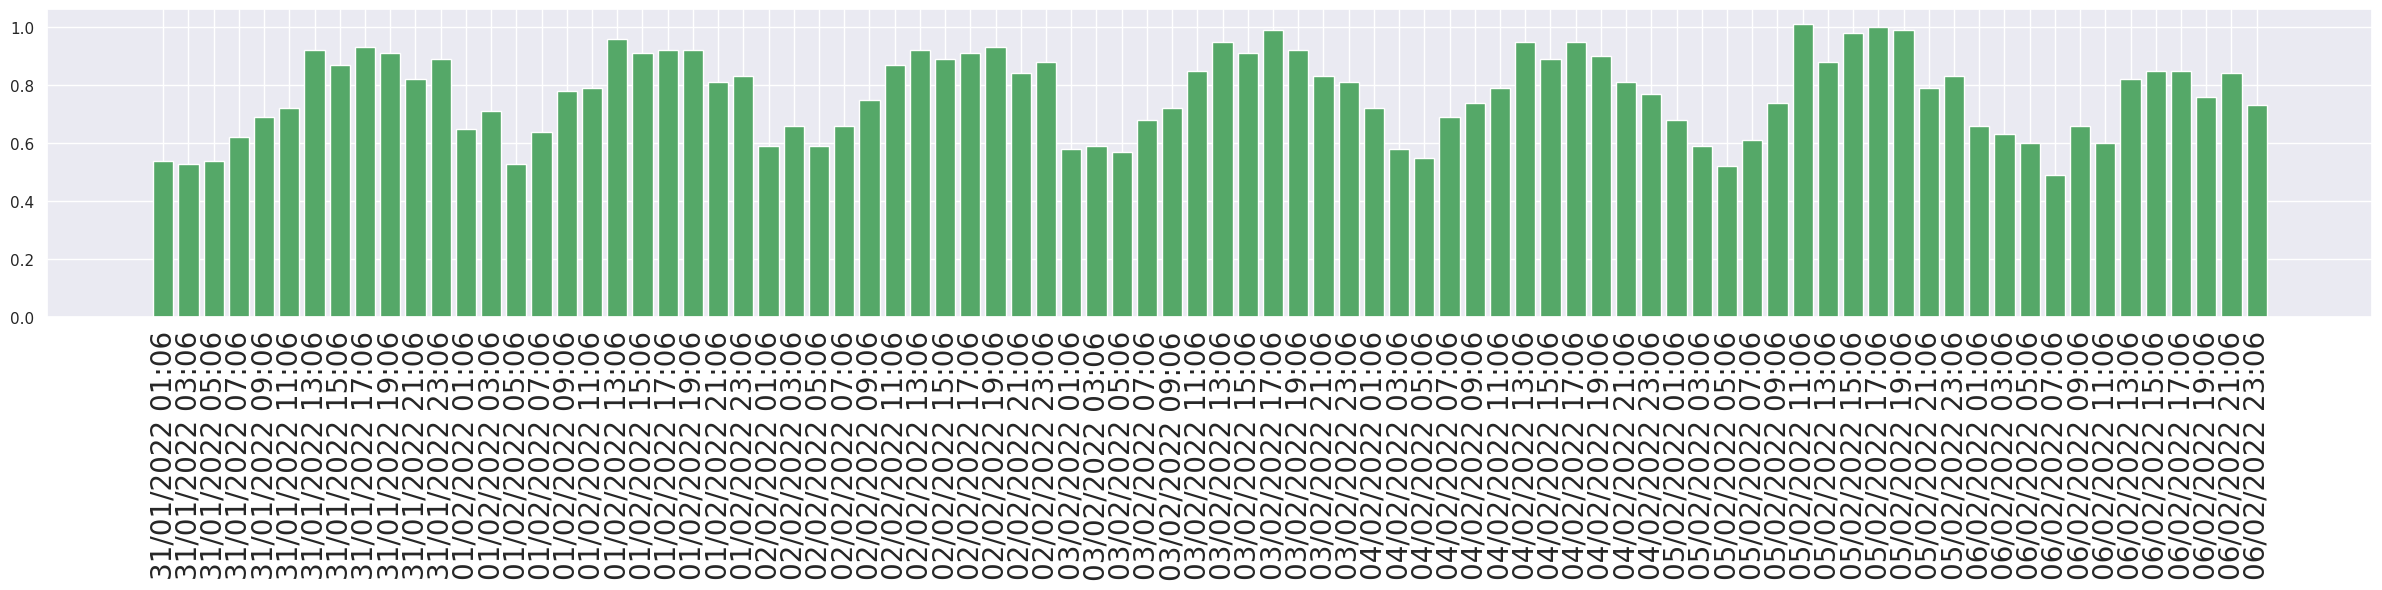

In [92]:
vec = np.array(select["E_volt_par_metre"])
#plt.plot(vec)
plt.figure(figsize=(30, 4))
plt.bar(range(len(vec)), vec, color="g")
plt.xticks(range(len(vec)), tuple(select["date"]), rotation=90, fontsize=20)
plt.title("")
#plt.savefig(f'{filename}.png', bbox_inches="tight", dpi=300)
plt.show()

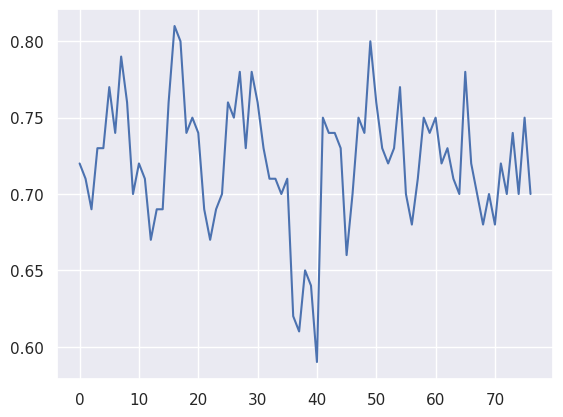

In [24]:
select["E_volt_par_metre"].std()

0.12906060070936515

In [26]:
current_datetime = i_datetime = datetime(2019, 4, 15)
res=[]
stds = []
for i in range(52*6):
    # dabord trouver un bon lundi
    lundi_datetime = dataset.measure_df[(dataset.measure_df["numero"]==sonde) & (dataset.measure_df["datetime"]>=current_datetime) & (dataset.measure_df["weekday"]==0)].iloc[0]["datetime"]
    last_datetime = lundi_datetime + timedelta(hours=(24*7))
    select = dataset.measure_df[(dataset.measure_df["numero"]==sonde) & (dataset.measure_df["datetime"]>=lundi_datetime) & (dataset.measure_df["datetime"]<last_datetime)]
    std = select["E_volt_par_metre"].std()
    res.append({"lundi_datetime":lundi_datetime, "select":select})
    stds.append(std)
    current_datetime = last_datetime
    

IndexError: single positional indexer is out-of-bounds